# 1. EDB Score 

In `data/DBData.csv`, you have the full "ease of doing business" dataset from the World Bank. Reformat it into the **Tidy Data** format, so one row is per-year-per-country

Result should look like:

![](EDB_unstack.png)

In [96]:
import pandas as pd
import numpy as np

def clean_up(url):
    df = pd.read_csv(url)
    if 'Unnamed: 20' in df:
        df = df.drop(['Unnamed: 20'], axis=1)
    df = df.drop(['Country Code'], axis=1)
    df = df.drop(['Indicator Code'], axis=1)
    df1 = pd.DataFrame(
        df.pivot(index='Indicator Name', 
                 columns='Country Name'
      ).unstack(
      ).reset_index(drop=False)
    )
    df2 = pd.DataFrame(
        df1.pivot(index=['level_0','Country Name'], 
                 columns='Indicator Name',
                  values=0
      ).reset_index(drop=False)
    )
    df2.rename(columns={'Indicator Name':'', 'level_0': 'Year'}, inplace=True)
    df2 = df2.fillna(0.)
    return df2

edb = clean_up('data/DBData.csv')
edb

Indicator Name,Year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score
0,2004,Afghanistan,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
1,2004,Albania,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
2,2004,Algeria,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
3,2004,Angola,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
4,2004,Antigua and Barbuda,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,2019,Vietnam,0.0,79.05,12.0,80.00,0.7,96.54,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,66.04,71.01,0.0,80.29,68.62
3388,2019,West Bank and Gaza,0.0,56.15,12.0,80.00,14.4,28.24,0.0,20.0,...,0.0,0.0,0.0,0.0,0.0,96.86,57.99,0.0,98.21,81.45
3389,2019,"Yemen, Rep.",0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00
3390,2019,Zambia,0.0,71.65,10.0,66.67,2.6,86.92,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,25.16,43.79,0.0,57.35,70.29


# 2 GDP and ease of doing business

Using the additional data in `data/GDPpc.csv`, join the clean dataset in **1** to the GDP data.

**What are the 3 Ease of Doing Business variables most closely linked to GDP?**

Answer by giving their correlation ratio, and give a possible explanation and a data visualization

**hint:** trying to do `df.corr()` or `sns.pairplot()` on the whole dataset will crash most computers. Be smart about the number of columns you're testing at once.

In [101]:
gdp = clean_up('data/GDPpc.csv')
gdp

Indicator Name,Year,Country Name,GDP per capita (current US$)
0,1960,Afghanistan,59.777327
1,1960,Albania,0.000000
2,1960,Algeria,244.824806
3,1960,American Samoa,0.000000
4,1960,Andorra,0.000000
...,...,...,...
15571,2018,West Bank and Gaza,0.000000
15572,2018,World,0.000000
15573,2018,"Yemen, Rep.",0.000000
15574,2018,Zambia,0.000000


In [207]:
"""
We use an inner merge, so as to only use values for years existing in both files,
in this case, it's for years greater than 2004, inclusively
this will also reduce the size of our data considerably, which will give us more columns to play with
"""
joined = edb.merge(gdp, how='inner')
joined

Indicator Name,Year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits (DB16-19 methodology) - Score,Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology),Dealing with construction permits: Building quality control index (0-15) (DB16-19 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Liability and insurance regimes index (0-2) (DB16-19 methodology),Dealing with construction permits: Procedures (number),...,Trading across borders: Documents to export (number) (DB06-15 methodology) - Score,Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,Trading across borders: Time to export (days) (DB06-15 methodology) - Score,Trading across borders: Time to export: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to export: Documentary compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import (days) (DB06-15 methodology) - Score,Trading across borders: Time to import: Border compliance (hours) (DB16-19 methodology) - Score,Trading across borders: Time to import: Documentary compliance (hours) (DB16-19 methodology) - Score,GDP per capita (current US$)
0,2004,Afghanistan,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,216.708129
1,2004,Albania,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,2373.581292
2,2004,Algeria,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,2598.908023
3,2004,Angola,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,1248.404906
4,2004,Antigua and Barbuda,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,10419.311130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2018,Vietnam,0.0,79.03,12.0,80.00,0.7,96.45,0.0,10.0,...,0.0,0.0,0.0,0.0,66.04,71.01,0.0,80.29,68.62,0.000000
2801,2018,West Bank and Gaza,0.0,56.70,12.0,80.00,13.9,30.42,0.0,20.0,...,0.0,0.0,0.0,0.0,96.86,57.99,0.0,98.21,81.45,0.000000
2802,2018,"Yemen, Rep.",0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.000000
2803,2018,Zambia,0.0,71.04,10.0,66.67,3.1,84.45,0.0,10.0,...,0.0,0.0,0.0,0.0,25.16,43.79,0.0,57.35,70.29,0.000000


In [218]:
"""
Let's narrow down some columns.
"""
columns = joined.columns
col_l = list(columns[starting_index:-1])
starting_index = 2
col_sums = [joined[col].sum() for col in col_l]
"""
First, let's remove columns whose sum of all values is 0, these won't serve any purpose
"""
del_zeros = [columns[starting_index:][zero]  for zero in np.where(np.array(col_sums) == 0.0)][0].tolist()
"""
Second, let's identify all columns whose number of occurences of 0.0 ranks above the 30th percentile
"""
z_counts = [joined[col].value_counts()[0.0] for col in col_l]
z_counts_30 = np.percentile(np.array(z_counts), 30)

del_in_70_perc = [columns[starting_index:][zero] for zero in np.where(np.array(z_counts) > z_counts_30)][0].tolist()
"""
Let's merge the two and delete the columns we don't want to use
"""
del_all = list(set(del_zeros + del_in_70_perc))
joined2 = joined.drop(del_in_70_perc,axis=1)
joined2

Indicator Name,Year,Country Name,Dealing with construction permits (DB06-15 methodology) - Score,Dealing with construction permits: Cost (% of Warehouse value),Dealing with construction permits: Cost (% of Warehouse value) - Score,Dealing with construction permits: Procedures (number),Dealing with construction permits: Procedures (number) - Score,Dealing with construction permits: Time (days),Dealing with construction permits: Time (days) - Score,Enforcing contracts (DB04-15 methodology) - Score,...,Starting a business: Time - Women (days)- Score,Time to export (days) (DB06-15 methodology),Time to import (days) (DB06-15 methodology),Trading across borders (DB06-15 methodology) - Score,Trading across borders: Cost to export (US$ per container deflated) (DB06-15 methodology),Trading across borders: Cost to import (US$ per container deflated)(DB06-15 methodology),Trading across borders: Documents to export (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology),Trading across borders: Documents to import (number) (DB06-15 methodology) - Score,GDP per capita (current US$)
0,2004,Afghanistan,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,216.708129
1,2004,Albania,0.0,0.0,0.00,0.0,0.0,0.0,0.00,59.4,...,59.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2373.581292
2,2004,Algeria,0.0,0.0,0.00,0.0,0.0,0.0,0.00,50.1,...,75.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2598.908023
3,2004,Angola,0.0,0.0,0.00,0.0,0.0,0.0,0.00,33.0,...,17.09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1248.404906
4,2004,Antigua and Barbuda,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10419.311130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2800,2018,Vietnam,0.0,0.7,96.45,10.0,80.0,166.0,59.65,0.0,...,78.39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2801,2018,West Bank and Gaza,0.0,13.9,30.42,20.0,40.0,108.0,76.37,0.0,...,56.28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2802,2018,"Yemen, Rep.",0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,59.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2803,2018,Zambia,0.0,3.1,84.45,10.0,80.0,189.0,53.03,0.0,...,91.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [286]:
"""
Let's now run correlation hypotheses over the remaining columns.
"""
# convenience
# study = joined.drop(['Year', 'Country Name'])
# n_cols = 
GDP = 'GDP per capita (current US$)'
cors = pd.DataFrame({
    'Indicator': list(joined2.columns[starting_index:-1])
})
cors['cor'] = cors.apply(lambda row: joined2[GDP].corr(joined2[row['Indicator']]), axis=1)
cors['cor'] = cors['cor'].abs()
cors = cors.sort_values(by='cor',ascending=False)
best_3 = [cors.iloc[i]['Indicator'] for i in range(3)]
print(best_3)
cors

['Resolving insolvency: Recovery rate (cents on the dollar)', 'Resolving insolvency: Recovery rate (cents on the dollar) - Score', 'Paying taxes: Tax payments per year (number) - Score']


,Indicator,cor
38,Resolving insolvency: Recovery rate (cents on ...,0.514233
39,Resolving insolvency: Recovery rate (cents on ...,0.514212
21,Paying taxes: Tax payments per year (number) -...,0.307694
19,Paying taxes: Payments (number per year),0.293716
62,Trading across borders: Documents to import (n...,0.277191
...,...,...
3,Dealing with construction permits: Procedures ...,0.078578
46,Starting a business: Paid-in Minimum capital (...,0.076648
20,Paying taxes: Profit tax (% of profits),0.071657
5,Dealing with construction permits: Time (days),0.048863


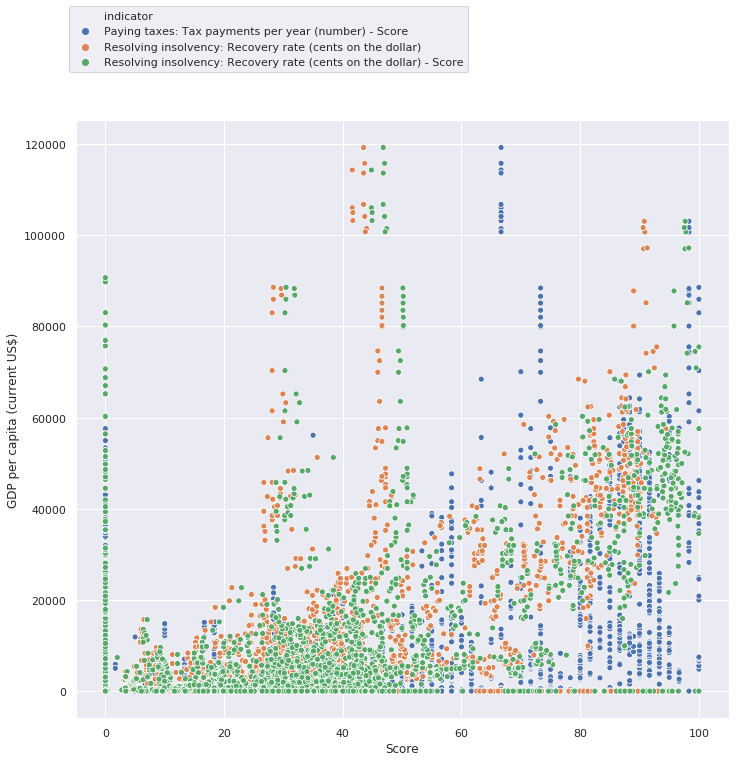

In [284]:
import seaborn as sns
import matplotlib as plt

filtered = joined2[joined2.columns.intersection(best_3 + [GDP])]

melted = filtered.melt(GDP, var_name='indicator',  value_name='Score')
sns.set(rc={'figure.figsize':(11.7,11)})
sc = sns.scatterplot( data=melted, y=GDP, x='Score', hue="indicator")
sc.legend(loc='upper right', bbox_to_anchor=(.61, 1.2), ncol=1)

### Top 3 Related Indicators
Our findings indicate that:
Resolving insolvency: Recovery rate (cents on the dollar)
Resolving insolvency: Recovery rate (cents on the dollar) - Score
Paying taxes: Tax payments per year (number) - Score

#### Resolving insolvency: Recovery rate (cents on the dollar)
This, (along with it's score), could be correlated to the GDP since the lower a population's insolvency, the less it is in debt. Being in less debt could translate into and increase of said population's purchasing power.
A higher purchasing power, would mean more internal spending, internal and external investing, which are all positive factors of the GDP.

#### Paying taxes: Tax payments per year (number) - Score
As a country's taxation system is its primary source of revenue/income, higher numbers of taxed individuals or person would likely result in higher tax incomes for it. This in turn, would result in a country being able to further re-invest its money into its own economy, invest abroad or put its money into more uses that could/would further increase its GDP.

# 3. Chocolate Nobel question

In this repository is the academic paper `chocolate_nobel.pdf`. 

Explain in 3 paragraphs why this paper's conclusions are bad statistics.

#### Population scale is disproportionate
While we can say that there might be more Nobel Laureates per 10M capita in european countries we cannot assume that a laureate over population ratio is indicative of anything when comparing countries whose difference in population is a multiple digit factor (ie: Switzerland has 8.5M inhabitants, China has 1.3B... factor of 162). In this case, the population pools are not random enough, nor are they unbiased/devoid enough of independent factors. The number of laureates is not very significant either, only 962 individuals have been given a nobel prize sinze 1901. The number of individuals who have ever lived since is a hard number to pinpoint, further adding to the vagueness of the author's conclusion.


#### Nobel Prizes are categorized, and each category can require various amounts of time for work to demonstrate its worthiness for consideration
For instance, work on an invention in Medicine can take a decade or so to demonstrate its usefullness to the world, whereas the Nobel Peace prize is awarded for work done in years recent to the time it is being awarded in. This means that this study, does not take into account the work, time and possible delay required before a laureate is even considered for a Nobel Prize. Which further puts into question whether the study considered if all laureates consummed chocolated during the time they worked on their ideas/inventions. For examply, the study does not break down the laureates into categories, perhaps European Inventors have won more long-term inventions over the last century than other younger countries. Another example which highlights this the prize for literature which is typically awarded for a body  of work over a lifetime, not for a singular work ([source](https://en.wikipedia.org/wiki/Nobel_Prize#cite_note-60)).


#### Chocolate creating smarter humans is a broad assumption
The author assumes that because chocolate gives an eater of chocolate a boost in cognitive function, it must mean that chocolate must have a direct effect on that country's inventors. In a way, this could be considered an endogeneous assumption, as the author assumes that all laureates are cognitively performant and that cognitice performance is positively correlated tied to chocolate consumption. Where in fact, cognition can be a manifestation of a multitude of internal or external factors (genetic factors, have functional mental disabilities, perhaps they take performance enhancing drugs, overall diet and exercise etc). Likewise, higher cognition then being correlated to winning a nobel prize is also a broad assumption: a potential laureate could be a very lazy person, be well funded in academia, be a world leader (Barack Obama), have managed to live long enough to be recognized for a Nobel Prize (only 2 posthumous laureates out of 962 sinze 1901, and are not permitted since 1974) or is even subjected to socio-economic factors preventing them from being considered.